In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [59]:
# Read the input image
image = cv2.imread('E:/ARK PERCEPTION/Luna/Input/table.png')
resized_image = cv2.resize(image, (300,250))


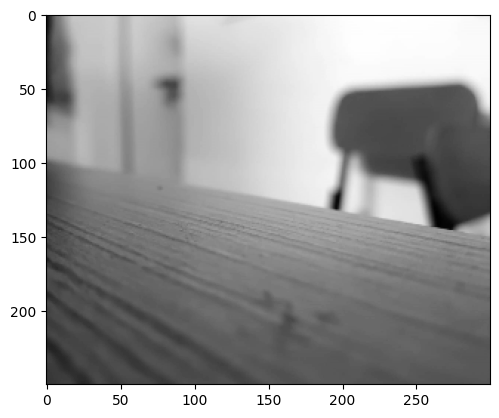

In [60]:
# Convert the image to grayscale
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(gray, cmap='gray')
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

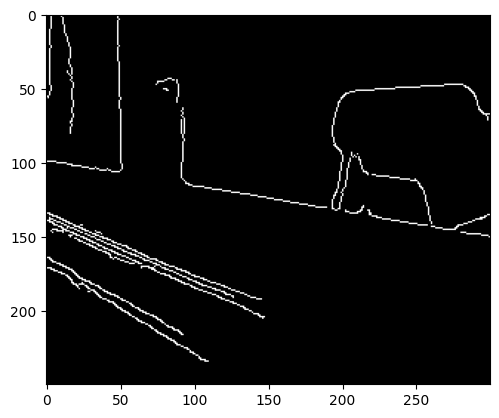

True

In [61]:
blurred = cv2.GaussianBlur(gray, (3, 3), 0)

# Apply Canny edge detection
edges = cv2.Canny(blurred, 20, 90)  # Adjust thresholds as needed

# Save the resulting edge image
cv2.imwrite('edge.png', edges)
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Display the image
plt.imshow(edges, cmap='gray')
#plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Save the resulting edge image
cv2.imwrite('E:/ARK PERCEPTION/Luna/output/edge_canney.png', edges)

Number of detected lines: 278
Line: (18, 62) to (18, 58)
Line: (4, 141) to (4, 140)
Line: (48, 20) to (48, 4)
Line: (100, 185) to (100, 184)
Line: (3, 146) to (4, 145)
Line: (198, 131) to (198, 127)
Line: (22, 153) to (22, 152)
Line: (60, 163) to (61, 163)
Line: (88, 59) to (88, 56)
Line: (2, 20) to (2, 10)
Line: (95, 226) to (95, 225)
Line: (30, 182) to (30, 181)
Line: (202, 54) to (202, 53)
Line: (74, 166) to (74, 165)
Line: (35, 190) to (35, 189)
Line: (77, 207) to (77, 206)
Line: (105, 183) to (105, 182)
Line: (14, 39) to (14, 38)
Line: (91, 110) to (91, 100)
Line: (89, 55) to (89, 47)
Line: (143, 203) to (143, 202)
Line: (16, 35) to (16, 34)
Line: (11, 139) to (11, 138)
Line: (96, 175) to (96, 174)
Line: (93, 85) to (93, 84)
Line: (194, 124) to (194, 122)
Line: (197, 62) to (197, 59)
Line: (51, 104) to (51, 101)
Line: (199, 57) to (199, 56)
Line: (198, 106) to (199, 105)
Line: (5, 167) to (18, 173)
Line: (67, 170) to (74, 173)
Line: (10, 141) to (17, 144)
Line: (61, 206) to (64, 2

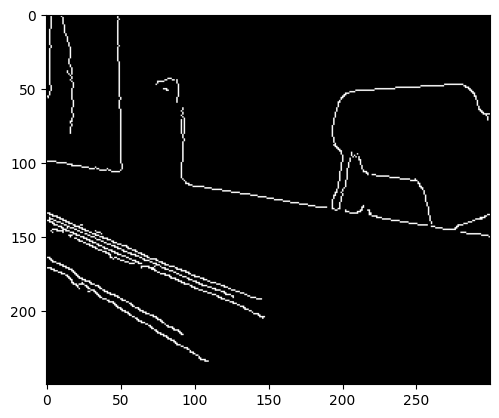

In [62]:
# Binarize the edge image (if necessary)
_, binary_image = cv2.threshold(edges, 127, 255, cv2.THRESH_BINARY)

#why 127 

# Define Hough Transform parameters
theta_resolution = 1 # Resolution of theta in degrees
rho_resolution = 1   # Resolution of rho in pixels
threshold = 1     # Minimum number of votes to consider a line
min_line_length = 1 # Minimum line length
max_line_gap = 1     # Maximum gap between line segments to treat them as a single line

# Perform Hough Transform
lines = cv2.HoughLinesP(binary_image, rho_resolution, theta_resolution, threshold, min_line_length, max_line_gap)

if lines is not None:
    num_lines = len(lines)
    print(f"Number of detected lines: {num_lines}")
else:
    print("No lines detected.")



# Draw detected lines on the original image
output_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)  # Convert to color for drawing lines
plt.imshow(output_image)
#if lines is not None:
   # for line in lines:
   #     x1, y1, x2, y2 = line[0]
   #     cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        print(f"Line: ({x1}, {y1}) to ({x2}, {y2})")

# Display or save the result

plt.imshow(output_image)
#cv2.imshow('Detected Lines', output_image)


# Draw detected lines on the original image


compleyed writing lines


True

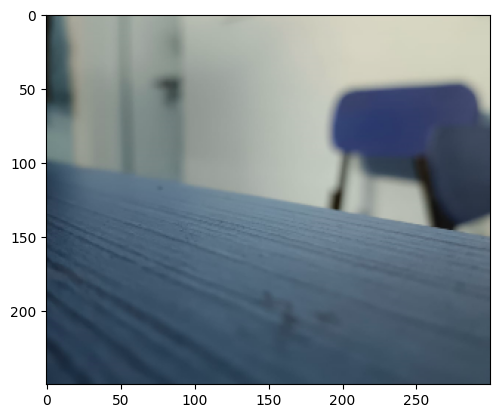

In [63]:
table_image = cv2.imread('E:/ARK PERCEPTION/Luna/output/resized_image.png')
plt.imshow(table_image)
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
# Draw the line on the image
        cv2.line(table_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

print("compleyed writing lines")
# Save the final result
cv2.imwrite('E:/ARK PERCEPTION/Luna/output/detected_lines3.png', table_image)